# Tratamento de Dados - Radiação de Corpo Negro

Primeiro, para calibragem do equipamento, fizemos as medidas das raias da lâmpada de Mercúrio. Depois, ao posicionar a lâmpada de filamento de tungstênio, optamos por realizar o experimento utilizando o coletor de luminosidade para os comprimentos de ondas destas raias.

Na etapa de calibração do equipamento, obtivemos

\begin{equation}
\delta \theta = \left|\left|\theta_R - \theta_o \right| - \left|\theta_L - \theta_o \right| \right| = 27',
\end{equation}

Onde $\theta_R$ é o ângulo de uma raia medido à direita, $\theta_L$ é o ângulo dessa mesma raia medida à esquerda e $\theta_o$ o ângulo onde se encontra a fenda central. Assim, vamos considerar o erro associado à medida do ângulo como:

\begin{equation}
\Delta \theta = \frac{1}{2} \delta \theta = 13,5'.
\end{equation}

Sendo assim, a primeira coisa que precisamos fazer é calcular o comprimento de onda à partir do ângulo medido pra as raias, utilizando:

\begin{equation}
\lambda = d \sin{(\theta)},
\end{equation}

lembrando que:

\begin{align}
\Delta \lambda = \left|d \cos{(\theta)} \right| \Delta \theta.
\end{align}

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
sns.set_theme()

thetao = 179.0833333 # angulo da raia central
dtheta = (np.pi/180.0)*0.225 # erro no angulo
d = 1.0e-3/600.0 # constante da rede

theta = [164.6666667, 163.8, 161.8833333, 159.75, 158.4, 154.0333333] # Angulo das raias

lmb = [d*np.sin((np.pi/180.0)*np.abs(i - thetao)) for i in theta] # Comprimentos de ondas
elmb = [d*dtheta*np.cos((np.pi/180.0)*np.abs(i - thetao)) for i in theta] # Erros propagados

for i in range(len(theta)):
  print(('%.3f & %.3f $\pm$ %.3f'%(theta[i],lmb[i]*1e9,elmb[i]*1e9)).replace(".",","))

164,667 & 414,953 $\pm$ 6,339
163,800 & 439,321 $\pm$ 6,314
161,883 & 492,847 $\pm$ 6,252
159,750 & 551,772 $\pm$ 6,176
158,400 & 588,671 $\pm$ 6,123
154,033 & 705,682 $\pm$ 5,929


Agora calculamos $R_o$:

\begin{equation}
R_o = \frac{V}{i (1 + \alpha T + \beta T^2)},
\end{equation}

onde essa medida foi feita à temperatura ambiente, lembrando de propagar o erro também:

\begin{align}
\Delta R_o & = \sqrt{\left|\frac{\partial R_o}{\partial V}\right|^2 (\Delta V)^2 + \left|\frac{\partial R_o}{\partial i}\right|^2 (\Delta i)^2 + \left|\frac{\partial R_o}{\partial T}\right|^2 (\Delta T)^2}, \\
\Delta R_o & = \sqrt{\left|\frac{1}{i (1 + \alpha T + \beta T^2)}\right|^2 (\Delta V)^2 + \left|\frac{V}{i^2 (1 + \alpha T + \beta T^2)}\right|^2 (\Delta i)^2 + \left|\frac{V (\alpha + 2 \beta T)}{i (1 + \alpha T + \beta T^2)^2}\right|^2 (\Delta T)^2}, \\
\Delta R_o & = \frac{1}{i (1 + \alpha T + \beta T^2)} \sqrt{(\Delta V)^2 + \left|\frac{V}{i} \right|^2 (\Delta i)^2 + \left|\frac{V (\alpha + 2 \beta T)}{(1 + \alpha T + \beta T^2)}\right|^2 (\Delta T)^2}.
\end{align}

In [ ]:
To = 20.0 # Temperatura ambiente em Celsius
dTo = 0.1 # Erro na temperatura
Vo = 0.2 # Tensão nessa temperatura
dV = 0.1 # erro na tensão
io = 0.39 # corrente nessa temp
di = 0.01 # erro na corrente

alpha = 4.82e-3
beta = 6.76e-7

Ro = Vo/(io*(1+alpha*To+beta*To**2))
dRo = (1.0/(io*(1+alpha*To+beta*To**2)))*np.sqrt(dV**2 + (Vo*di/io)**2 + (Vo*(alpha+2*beta*To)*dTo/(1+alpha*To+beta*To**2))**2)

print("Ro = %f + ou - %f"%(Ro,dRo))

Ro = 0.467616 + ou - 0.234115


Com isso em mãos, podemos calcular a temperatura do filamento para cada etapa do experimento utilizando:

\begin{equation}
T = 273,15 + \frac{1}{2 \beta} \left[\sqrt{\alpha^2 + 4 \beta \left(\frac{V}{R_o i} - 1 \right)} - \alpha \right],
\end{equation}

lembrando que

\begin{align}
\Delta T & = \sqrt{ \left|\frac{\partial T}{\partial V} \right|^2 (\Delta V)^2 + \left|\frac{\partial T}{\partial i} \right|^2 (\Delta i)^2 + \left|\frac{\partial T}{\partial R_o} \right|^2 (\Delta R_o)^2}, \\
\Delta T & = \frac{1}{4 \beta \sqrt{\alpha^2 + 4 \beta \left(\frac{V}{R_o i} - 1 \right)}} \sqrt{ \left|\frac{4 \beta}{R_o i} \right|^2 (\Delta V)^2 + \left|\frac{4 \beta V}{R_o i^2} \right|^2 (\Delta i)^2 + \left|\frac{4 \beta V}{R_o ^2 i} \right|^2 (\Delta R_o)^2}, \\
\Delta T & = \frac{1}{R_o i \sqrt{\alpha^2 + 4 \beta \left(\frac{V}{R_o i} - 1 \right)}} \sqrt{(\Delta V)^2 + \left|\frac{V}{i} \right|^2 (\Delta i)^2 + \left|\frac{V}{R_o} \right|^2 (\Delta R_o)^2}.
\end{align}

In [ ]:
V = [2.5, 5.0, 7.5, 10.0]
i = [1.54, 2.07, 2.54, 2.92]

T = [273.15 + (0.5/beta)*(np.sqrt(alpha**2 + 4*beta*(V[j]/(Ro*i[j]) - 1)) - alpha) for j in range(len(V))] # Temperatura em Kelvins
dT = [(1.0/(Ro*i[j]*np.sqrt(alpha**2 + 4*beta*(V[j]/(Ro*i[j]) - 1))))*np.sqrt(dV**2 + (V[j]*di/i[j])**2 + (V[j]*dRo/Ro)**2) for j in range(len(V))]

for j in range(len(T)):
  print(('%.1f & %.2f & %.3f $\pm$ %.3f'%(V[j],i[j],T[j],dT[j])).replace('.',','))

2,5 & 1,54 & 753,562 $\pm$ 318,816
5,0 & 2,07 & 1052,230 $\pm$ 440,691
7,5 & 2,54 & 1243,646 $\pm$ 515,746
10,0 & 2,92 & 1405,335 $\pm$ 577,488


Vamos calcular também a potência irradiada pelo filamento:

\begin{equation}
P = Vi,
\end{equation}

Lembrando de propagar o Erro:

\begin{align}
\Delta P & = \sqrt{\left|\frac{\partial P}{\partial V} \right|^2 (\Delta V)^2 + \left|\frac{\partial P}{\partial i} \right|^2 (\Delta i)^2}, \\
\Delta P & = \sqrt{\left|i \right|^2 (\Delta V)^2 + \left|V \right|^2 (\Delta i)^2},
\end{align}

In [ ]:
P = [V[j]*i[j] for j in range(len(V))]
dP = [np.sqrt((i[j]*dV)**2 + (V[j]*di)**2) for j in range(len(V))]

for j in range(len(P)):
  print(('%.1f & %.2f & %.3f $\pm$ %.3f'%(V[j], i[j], P[j], dP[j])).replace('.',','))

2,5 & 1,54 & 3,850 $\pm$ 0,156
5,0 & 2,07 & 10,350 $\pm$ 0,213
7,5 & 2,54 & 19,050 $\pm$ 0,265
10,0 & 2,92 & 29,200 $\pm$ 0,309


Recorde que, na proposta de experimento, vimos que:

\begin{equation}
P = C(T-T_0) + \varepsilon_f\sigma A(T^4-T_0^4) = C(T-T_0) + b (T^4-T_0^4),
\end{equation}

que pode ser resolvido de forma a achar os melhores parâmetros para que essa curva seja um bom fit pros dados. (usando o módulo scipy.optimize)

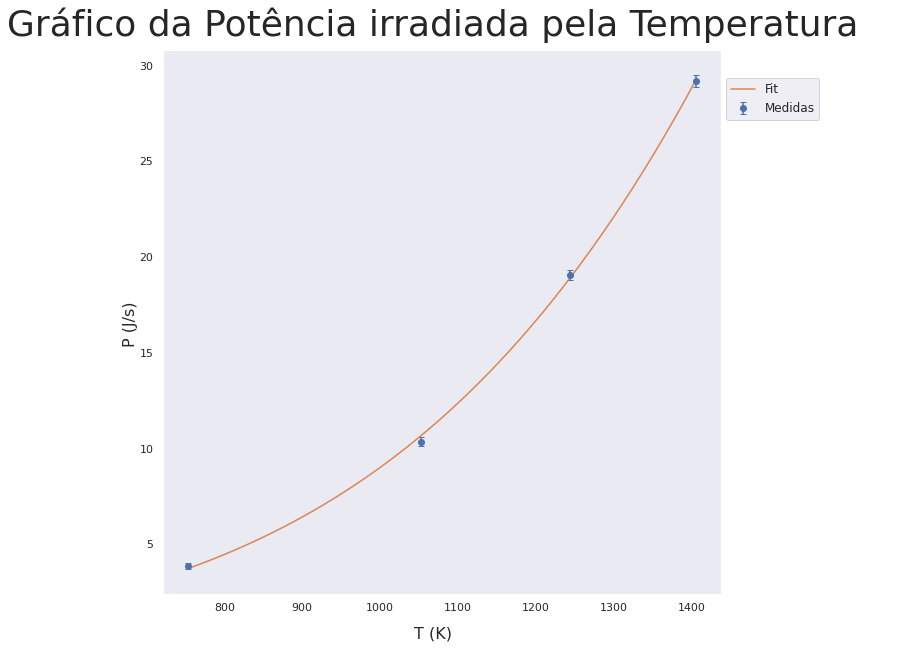

In [ ]:
import scipy.optimize as opt

def Pr(T,a,b):
  return a*(T-293.15) + b*(T**4 - (293.15)**4)

const, ePf = opt.curve_fit(Pr, T, P, sigma=dP, absolute_sigma=True)

fig1, ax = plt.subplots(nrows=1, ncols=1) # figsize=(15,25)
fig1.set_figwidth(10)
fig1.set_figheight(10)
fig1.suptitle('Gráfico da Potência irradiada pela Temperatura', y=0.94, fontsize=36)

Tlin = np.linspace(T[0], T[len(T)-1], num=50)

ax.errorbar(T, P, yerr=dP, fmt='o', label='Medidas', capsize=3)
ax.plot(Tlin, [Pr(j,const[0],const[1]) for j in Tlin], label='Fit')
ax.grid()

fig1.text(0.5, 0.07, 'T (K)', ha='center', va='center',fontsize=16)
fig1.text(0.08, 0.5, 'P (J/s)', ha='center', va='center', rotation='vertical',fontsize=16)
handles, labels = ax.get_legend_handles_labels()
fig1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.0, 0.8), fontsize=12)

De forma menos exata, se assumirmos que, para altas temperaturas,

\begin{equation}
P \approx \varepsilon_f \sigma A T^4,
\end{equation}

Então

\begin{equation}
\log{(P)} \approx 4 \log{(T)} + \log{(\varepsilon_f \sigma A)} = a x + b,
\end{equation}

Que podemos linearizar. Aqui é importante ressaltar que o erro propagado, será:

\begin{equation}
\Delta \log{(P)} = \frac{\Delta P}{P}.
\end{equation}

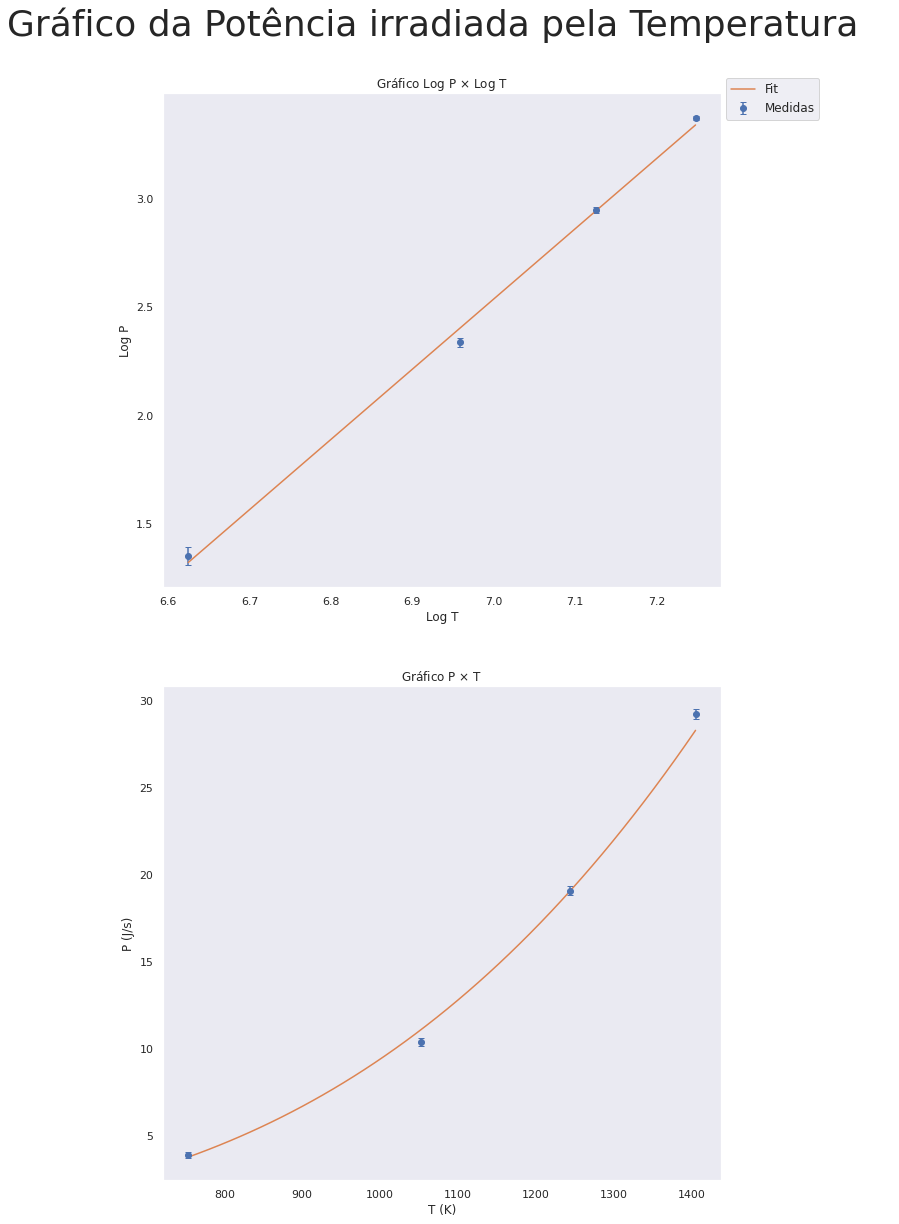

In [ ]:
x = np.array([np.log(j) for j in T]).reshape(-1, 1)
xlin = np.array([np.log(j) for j in Tlin]).reshape(-1, 1)
y = np.array([np.log(j) for j in P]).reshape(-1, 1)

yfit = linear_model.LinearRegression(fit_intercept=True) # rinterno que vai ser fitado

yfit.fit(x,y)

ypred = yfit.predict(xlin)
ypred2 = yfit.predict(x)

potencia = yfit.coef_

b = yfit.intercept_

# Erro quadrático médio de cada predição anterior
erry = np.sqrt(mean_squared_error(y,ypred2))

fig1, axs = plt.subplots(nrows=2, ncols=1) # figsize=(15,25)
fig1.set_figwidth(10)
fig1.set_figheight(20)
fig1.suptitle('Gráfico da Potência irradiada pela Temperatura', y=0.94, fontsize=36)

axs[0].errorbar(np.reshape(x,len(x)), np.reshape(y,len(y)), yerr=[dP[j]/P[j] for j in range(len(dP))], fmt='o', label='Medidas', capsize=3)
axs[0].plot(xlin, ypred, label='Fit')
axs[0].set(title=(r'Gráfico Log P $\times$ Log T'))
axs[0].set(xlabel='Log T', ylabel='Log P')
axs[0].grid()

axs[1].errorbar(T, P, yerr=dP, fmt='o', label='Medidas', capsize=3)
axs[1].plot(Tlin, [np.exp(j) for j in ypred], label='Fit')
axs[1].set(title=(r'Gráfico P $\times$ T'))
axs[1].set(xlabel='T (K)', ylabel='P (J/s)')
axs[1].grid()

handles, labels = axs[0].get_legend_handles_labels()
handles, labels = axs[1].get_legend_handles_labels()
fig1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.0, 0.8), fontsize=12)

Outra opção é tratar, linearizando em termos de $x = T^4$, de forma que tenhamos:

\begin{equation}
P = \varepsilon_f \sigma A x - \varepsilon_f \sigma A T_o^4  = a x + b.
\end{equation}

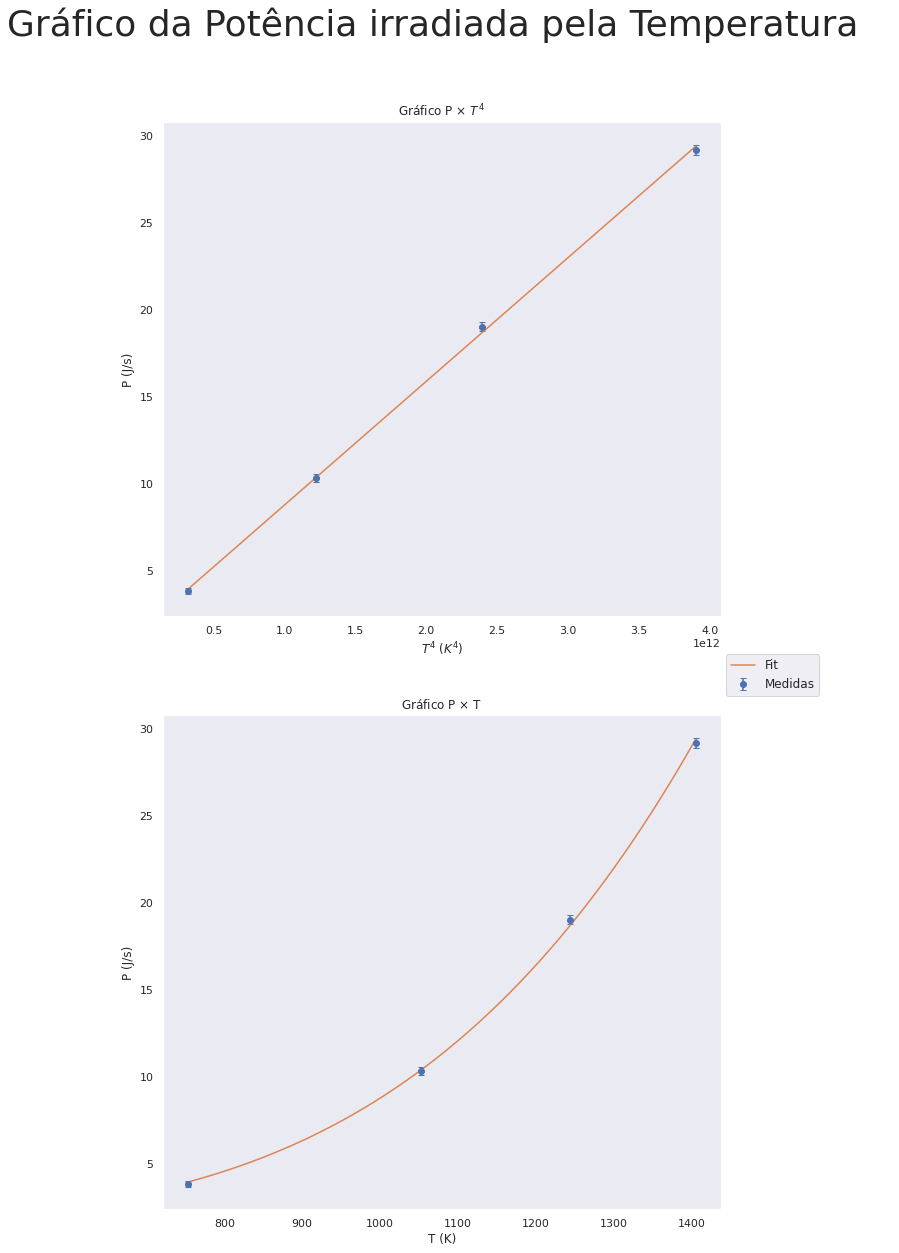

In [ ]:
x2 = np.array([j**4 for j in T]).reshape(-1, 1)
xlin2 = np.array([j**4 for j in Tlin]).reshape(-1,1)
y2 = np.array(P).reshape(-1, 1)

To4 = 293.15**4

y2fit = linear_model.LinearRegression(fit_intercept=True)

y2fit.fit(x2,y2)

y2pred = y2fit.predict(x2)
y2predlin = y2fit.predict(xlin2)

a = y2fit.coef_
b2 = y2fit.intercept_

# Erro quadrático médio de cada predição anterior
erry2 = np.sqrt(mean_squared_error(y2,y2pred))

fig1, axs = plt.subplots(nrows=2, ncols=1)
fig1.set_figwidth(10)
fig1.set_figheight(20)
fig1.suptitle('Gráfico da Potência irradiada pela Temperatura', y=0.96, fontsize=36)

axs[0].errorbar(np.reshape(x2,len(x2)), np.reshape(y2,len(y2)), yerr=dP, fmt='o', label='Medidas', capsize=3)
axs[0].plot(xlin2, y2predlin, label='Fit')
axs[0].set(title=(r'Gráfico P $\times \ T^4$'))
axs[0].set(xlabel=r'$T^4$ ($K^4$)', ylabel='P (J/s)')
axs[0].grid()

axs[1].errorbar(T, P, yerr=dP, fmt='o', label='Medidas', capsize=3)
axs[1].plot(Tlin, y2predlin, label='Fit')
axs[1].set(title=(r'Gráfico P $\times$ T'))
axs[1].set(xlabel='T (K)', ylabel='P (J/s)')
axs[1].grid()

handles, labels = axs[0].get_legend_handles_labels()
handles, labels = axs[1].get_legend_handles_labels()
fig1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.0, 0.42), fontsize=12)

Observe que ambas as análises nos dão bons resultados, o que indica que a aproximação de desprezar os termos lineares é muito boa, de fato. Entretanto, se assumirmos a constante de Boltzmann tabelada como verdade, podemos obter o produto:

\begin{equation}
\varepsilon_f A = \frac{b}{\sigma},
\end{equation}

Para ambos os casos, isto é,

In [ ]:
sigma = 5.67037e-8

eA1 = const[1]/sigma
print('Pelo primeiro método, que esperamos ser o mais próximo da realidade, epsilon A = %f m^2'%eA1)
print('')

eA2 = np.exp(b[0])/sigma
print('Pela aproximação ignorando o termo linear, o produto epsilon A = %f m^2'%eA2)
print('')

eA3 = b2[0]/(To4*sigma)
eA32 = a[0]/sigma
print('Pela terceira forma, que também utiliza a aproximação, mas deve ser um pouco melhor que a segunda forma, o produto epsilon A pode ser obtido de duas formas:')
print('epsilon A = %f m^2 ou epsilon A = %f m^2'%(eA3,eA32))

Pelo primeiro método, que esperamos ser o mais próximo da realidade, epsilon A = 0.000114 m^2

Pela aproximação ignorando o termo linear, o produto epsilon A = 0.030188 m^2

Pela terceira forma, que também utiliza a aproximação, mas deve ser um pouco melhor que a segunda forma, o produto epsilon A pode ser obtido de duas formas:
epsilon A = 0.004014 m^2 ou epsilon A = 0.000125 m^2


Que resulta em produtos de Emissividade pela Área diferentes uns dos outros, porém no terceiro e primeiro casos bem próximos um dos outros.

Agora é só calcularmos a potência que o coletor de luminosidade estava medindo a cada frequência, para podermos prosseguir para inferir a distribuição de Planck e a constante de Boltzmann. Considerando que a resistência do coletor seja constante, a potência medida será:

\begin{equation}
\frac{dU}{dt} = \frac{V^2 (\lambda, T)}{R_{\text{coletor}}}.
\end{equation}

Nesse caso, então:

\begin{equation}
R(\lambda,T) d\lambda \propto V^2(\lambda, T) d\lambda.
\end{equation}

Vamos assumir que este é o caso, para que possamos dar continuidade à análise. Primeiro, precisamos obter as tensões quadráticas para cada comprimento de onda e cada temperatura do filamento, lembrando de multiplicar as tensões e o erro na leitura pelo fundo de escala.

Claro que devemos lembrar de propagar o Erro:

\begin{align}
\Delta V^2 = \left|\frac{\partial V^2}{V} \right| \Delta V, \\
\Delta V^2 = 2 V \Delta V.
\end{align}

In [ ]:
fundo = 0.200 # fundo de escala

Vm = np.array([[1.0, 1.1, 1.2, 1.3, 1.4, 1.8], [6.3,5.7, 6.0, 8.4, 11.5, 33.5], [23.2, 21.5, 25.5, 39.5, 73.0, 121.2], [59.3, 56.0, 63.8, 96.6, 119.1, 164.5]])
Vc = fundo*Vm
V2 = Vc**2
dV2 = 2.0*fundo*dV*Vc

Feito isto, temos duas análises possíveis.

A primeira achando os parâmetros tais que a expressão encontrada matematicamente por Planck (a qual vamos assumir que ainda não sabemos sobre o valor da constante de boltzmann nem a constante de Planck) seja um bom fit, isto é:

\begin{equation}
V^2 (\lambda, T) = \frac{a}{\lambda^5} \frac{1}{\left(e^{\frac{b}{\lambda T}} - 1\right)}.
\end{equation}

Vamos achar $a$ e $b$ para cada temperatura, podemos então calcular $a_m$ e $b_m$.

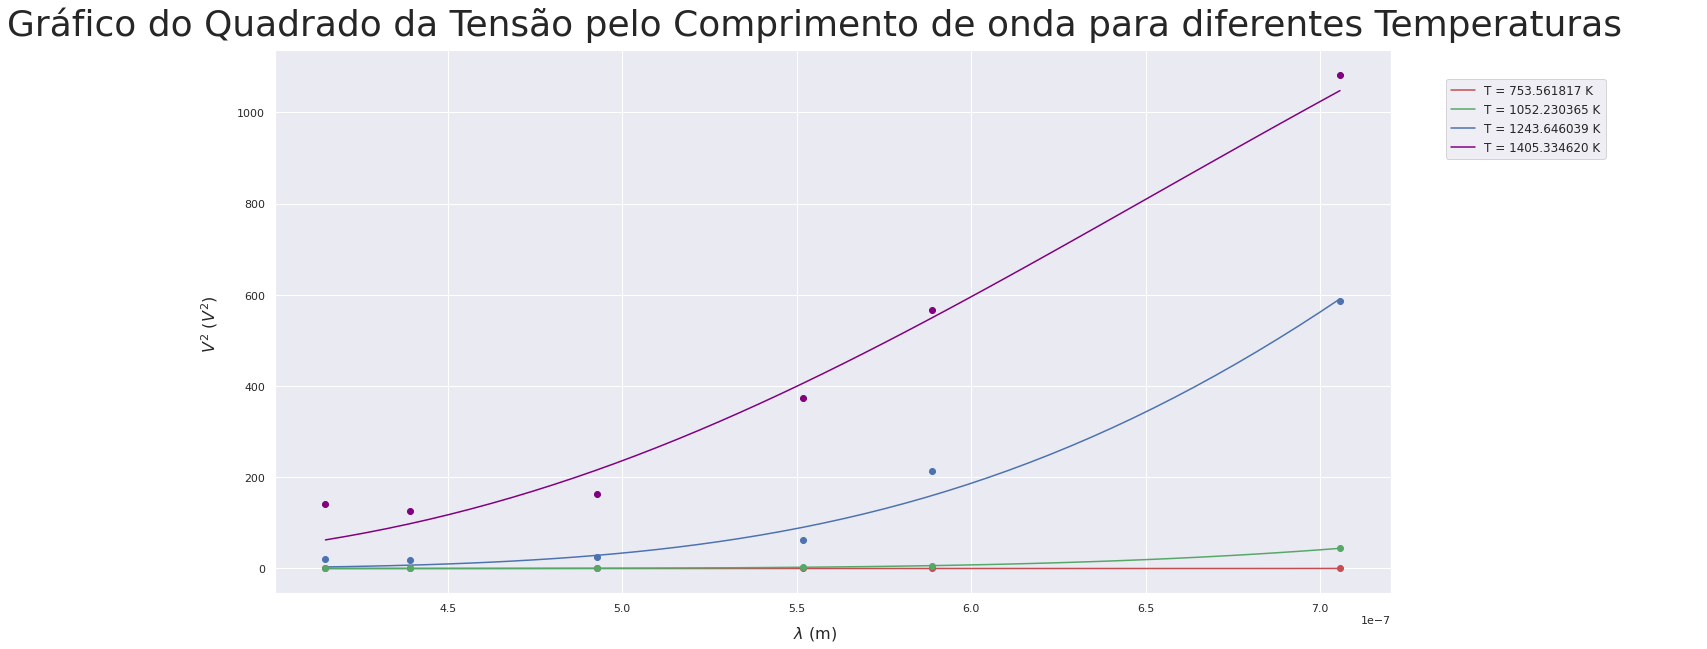

In [ ]:
def V2dist(X, a, b):
  lmb,T = X
  return (a/lmb**5)*(1.0/(np.exp(b/(lmb*T))-1.0))

parametros = []
X = []
for j in range(len(T)):
  X = [lmb, [T[j]]*len(lmb)]
  const2, econst = opt.curve_fit(V2dist, np.asarray(X), V2[j], p0=[5.0,2.8e-2], sigma=dV2[j], absolute_sigma=True) # O p0 aqui é um chute inicial pros parâmetros. Esse chute é importante, pq a distribuição de Planck é transcendental,
  parametros.append(const2)                                                                                        # Tem mais de um zero não trivial e tals
  X = []

anovo = [row[0] for row in parametros]
anm = sum(anovo)/float(len(anovo))
bnovo = [row[1] for row in parametros]
bnm = sum(bnovo)/float(len(bnovo))
ebnm = np.sqrt(mean_squared_error(np.asarray(bnovo).reshape(-1,1),np.full(len(bnovo),bnm).reshape(-1,1)))

cores = ['r','g','b','purple']

lmblin = np.linspace(lmb[0], lmb[len(lmb)-1], num=50)

fig1, ax = plt.subplots(nrows=1, ncols=1) # figsize=(15,25)
fig1.set_figwidth(20)
fig1.set_figheight(10)
fig1.suptitle('Gráfico do Quadrado da Tensão pelo Comprimento de onda para diferentes Temperaturas', y=0.94, fontsize=36)

for j in range(len(T)):
  ax.errorbar(lmb, V2[j], yerr=dV2[j], fmt='o', color=cores[j], capsize=3)
  ax.plot(lmblin, [V2dist([k, T[j]], parametros[j][0], parametros[j][1]) for k in lmblin], color=cores[j], label=('T = %f K'%T[j]))
  ax.grid()

fig1.text(0.5, 0.07, r'$\lambda$ (m)', ha='center', va='center',fontsize=16)
fig1.text(0.08, 0.5, r'$V^2$ ($V^2$)', ha='center', va='center', rotation='vertical',fontsize=16)
handles, labels = ax.get_legend_handles_labels()
fig1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.0, 0.8), fontsize=12)

A segunda forma é utilizando a aproximação de Wien:

\begin{equation}
V^2(\lambda, T) \approx \frac{a}{\lambda^5} e^{\frac{b}{\lambda T}},
\end{equation}

E, portanto,

\begin{equation}
\log{[V^2(\lambda, T)]} \approx \log{(a)} - 5 \log{\lambda} + \frac{b}{\lambda T} = \frac{k}{T} + c.
\end{equation}

Aqui mais uma vez vale ressaltar que:

\begin{equation}
\Delta \log{(V^2)} = \frac{\Delta V^2}{V^2}.
\end{equation}

Continuando, temos que:

\begin{equation}
b = k \lambda,
\end{equation}

E, portanto,

\begin{equation}
\Delta b = \left|k \right| \Delta \lambda.
\end{equation}

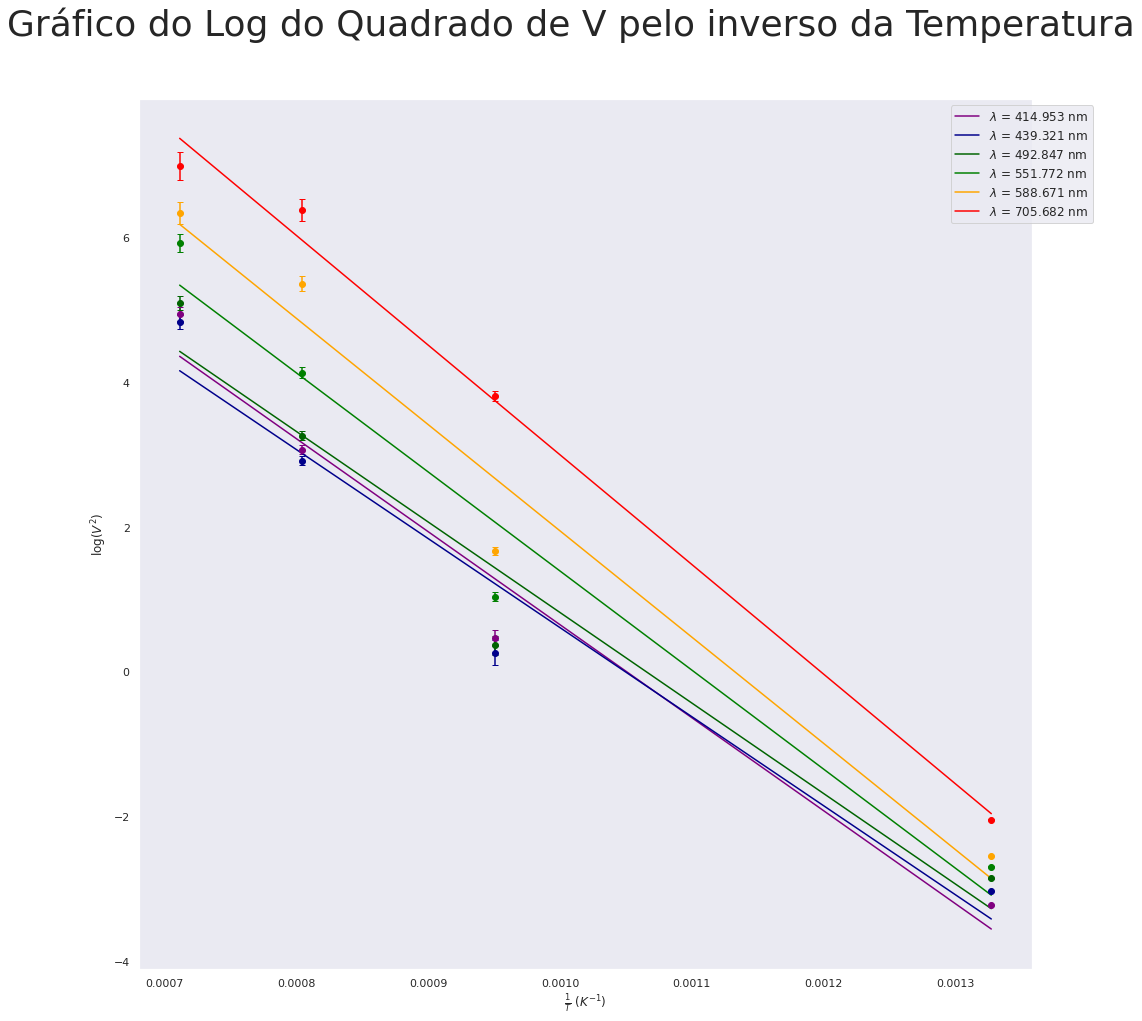

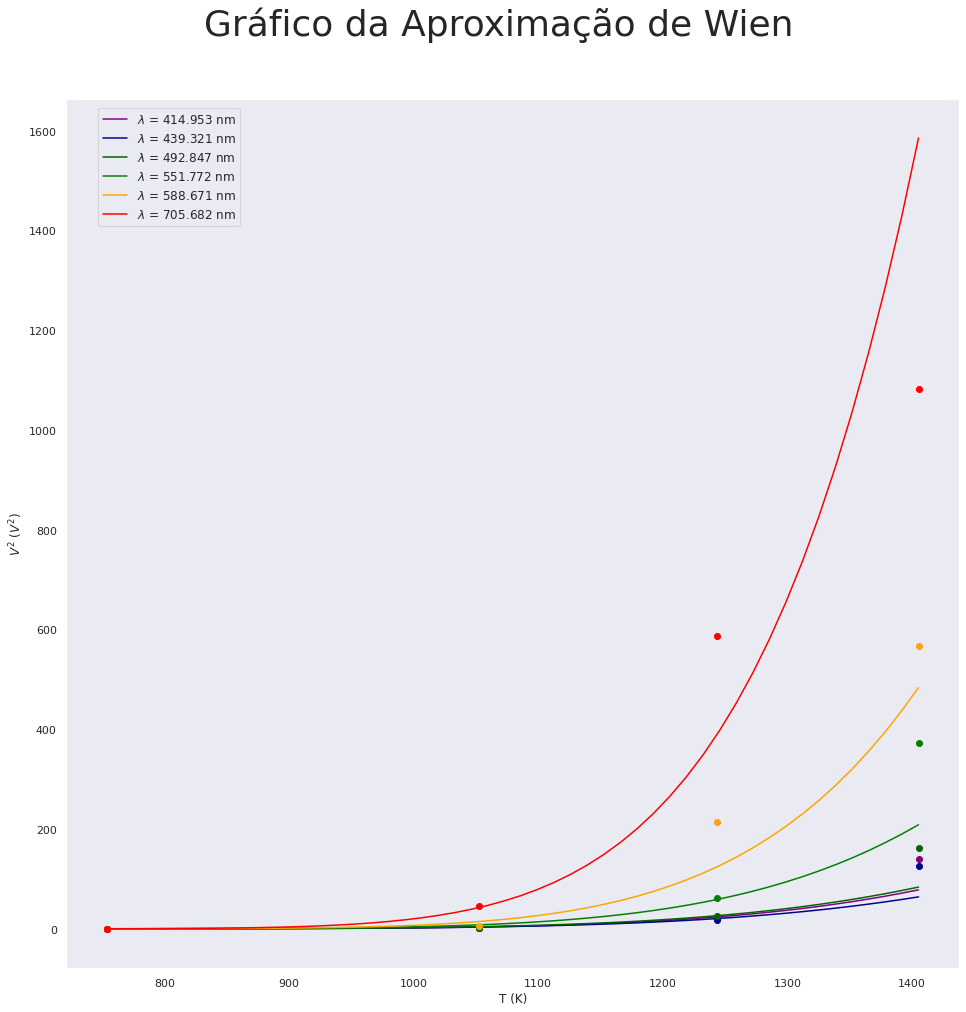

In [ ]:
import matplotlib.colors as mcolors

lnV2 = np.log(V2)
dlnV2 = []
for i in range(len(lnV2)):
  dlnV2i = [dV2[i][j]/lnV2[i][j] for j in range(len(lnV2[i]))]
  dlnV2.append(dlnV2i)
xT = np.array([1.0/j for j in T]).reshape(-1, 1)
xTlin = np.array([1.0/j for j in Tlin]).reshape(-1,1)
yT = []
dyT = []
lnV2pred = []
lnV2pred2 = []
inclina = []
for j in range(len(lmb)):
  yV2 = np.array([row[j] for row in lnV2]).reshape(-1, 1)
  dyV2 = [row[j] for row in dlnV2]
  yT.append(yV2)
  dyT.append(dyV2)
  yV2fit = linear_model.LinearRegression(fit_intercept=True)
  yV2fit.fit(xT,yV2)
  yV2pred = yV2fit.predict(xT)
  yV2pred2 = yV2fit.predict(xTlin)
  k = yV2fit.coef_
  c = yV2fit.intercept_
  inclina.append(k)
  lnV2pred.append(yV2pred)
  lnV2pred2.append(yV2pred2)

  # Erro quadrático médio de cada predição anterior
  erryV2 = np.sqrt(mean_squared_error(yV2,yV2pred))

inclinaconst = [inclina[j]*lmb[j] for j in range(len(lmb))] # A parte constante da inclinação, que não depende do lambda
errinclina = [inclina[j]*elmb[j] for j in range(len(lmb))]
inclinam = sum(inclinaconst)/float(len(inclinaconst))
errinclinam = np.sqrt(sum([j*j for j in errinclina]))/float(len(inclinaconst))

fig1, axs = plt.subplots(nrows=1, ncols=1)
fig1.set_figwidth(16)
fig1.set_figheight(16)
fig1.suptitle('Gráfico do Log do Quadrado de V pelo inverso da Temperatura', y=0.96, fontsize=36)

cores2 = ['purple', 'darkblue', 'darkgreen', 'green', 'orange', 'red']

for j in range(len(lmb)):
  axs.errorbar(np.reshape(xT,len(xT)), np.reshape(yT[j],len(yT[j])), yerr=dyT[j], fmt='o', color=cores2[j], capsize=3)
  axs.plot(xT, lnV2pred[j], color=cores2[j], label=(r'$\lambda$ = %.3f nm'%(lmb[j]*1e9)))
axs.set(xlabel=r'$\frac{1}{T}$ ($K^{-1}$)', ylabel=r'$\log{(V^2)}$')
axs.grid()

handles, labels = axs.get_legend_handles_labels()
fig1.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.82, 0.8), fontsize=12)

fig2, axs2 = plt.subplots(nrows=1, ncols=1)
fig2.set_figwidth(16)
fig2.set_figheight(16)
fig2.suptitle('Gráfico da Aproximação de Wien', y=0.96, fontsize=36)

for j in range(len(lmb)):
  axs2.errorbar(T, np.reshape(np.exp(yT[j]),len(yT[j])), yerr=[row[j] for row in dV2], fmt='o', color=cores2[j], capsize=3)
  axs2.plot(Tlin, np.exp(lnV2pred2[j]), color=cores2[j], label=(r'$\lambda$ = %.3f nm'%(lmb[j]*1e9)))
axs2.set(xlabel=r'T (K)', ylabel=r'$V^2$ ($V^2$)')
axs2.grid()

handles, labels = axs2.get_legend_handles_labels()
fig2.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.08, 0.79), fontsize=12)

Por fim, agora é só calcularmos a constante de Planck e a constante de Boltzmann.

\begin{align}
\sigma & = \frac{2 \pi^5 k_B^4}{15 c^2 h^3}, \\
b & = \frac{h c}{k_B} \to h = \frac{b k_B}{c}, \\
\sigma & = \frac{2 \pi^5 c k_B}{15 b^3} \to k_B = \frac{15 \sigma b^3}{2 \pi^5 c}, \\
h & = \frac{15 \sigma b^4}{2 \pi^5 c^2}.
\end{align}

Lembrando de propagar o erro para as constantes calculadas pelo segundo método:

\begin{align}
\Delta k_B & = \left|\frac{45 \sigma b^2}{2 \pi^5 c} \right| \Delta b, \\
\Delta h & = \left|\frac{30 \sigma b^3}{\pi^5 c^2} \right| \Delta b.
\end{align}

Depois calculamos a constante universal dos gases:

\begin{equation}
R = N_A k_B,
\end{equation}

Cujo erro será:

\begin{equation}
\Delta R = N_A \Delta k_B.
\end{equation}

Para terminar, calcularemos a discrepância percentual para cada uma delas, é claro:

\begin{equation}
\delta f = \frac{100 \left|f_{lab} - f_{real} \right|}{f_{real}}
\end{equation}

In [ ]:
kbreal = 1.380649e-23
hreal = 6.62607015e-34
NA = 6.022e23
Rreal = 8.31

kb2 = []
h2 = []
R2 = []
dR2 = []
deltak2 = []
deltah2 = []
deltaR2 = []

kb = []
dkb = []
h = []
dh = []
R = []
dR = []
deltak = []
deltah = []
deltaR = []

for i in range(len(bnovo)):
  kbi2 = (15.0*sigma*np.abs(bnovo[i]**3))/(2.0*(np.pi**5)*3.0e8)
  hi2 = (15.0*sigma*bnovo[i]**4)/(2.0*(np.pi**5)*(3.0e8**2))
  Ri2 = NA*kbi2
  kb2.append(kbi2)
  h2.append(hi2)
  R2.append(Ri2)
  deltak2i = 100.0*np.abs(kbi2-kbreal)/kbreal
  deltak2.append(deltak2i)
  deltah2i = 100.0*np.abs(hi2-hreal)/hreal
  deltah2.append(deltah2i)
  deltaRi2 = 100.0*np.abs(Ri2-Rreal)/Rreal
  deltaR2.append(deltaRi2)

kr2 = sum(kb2)/float(len(kb2))
ekr2 = np.sqrt(mean_squared_error(np.asarray(kb2).reshape(-1, 1),np.full(len(kb2), kr2).reshape(-1, 1)))

hr2 = sum(h2)/float(len(h2))
ehr2 = np.sqrt(mean_squared_error(np.asarray(h2).reshape(-1, 1),np.full(len(h2), hr2).reshape(-1, 1)))

Rr2 = sum(R2)/float(len(R2))
eR2 = np.sqrt(mean_squared_error(np.asarray(R2).reshape(-1, 1),np.full(len(R2), Rr2).reshape(-1, 1)))

deltakr2 = 100.0*np.abs(kr2-kbreal)/kbreal
deltahr2 = 100.0*np.abs(hr2-hreal)/hreal
deltaRr2 = 100.0*np.abs(Rr2-Rreal)/Rreal

kr2c = (sum(kb2)-kb2[0])/float(len(kb2)-1.0)
ekr2c = np.sqrt(mean_squared_error(np.delete(np.asarray(kb2), 0, 0).reshape(-1, 1),np.full((len(kb2)-1), kr2c).reshape(-1, 1)))

hr2c = (sum(h2)- h2[0])/float(len(h2) - 1.0)
ehr2c = np.sqrt(mean_squared_error(np.delete(np.asarray(h2),0, 0).reshape(-1, 1),np.full((len(h2)-1), hr2c).reshape(-1, 1)))

Rr2c = (sum(R2) - R2[0])/float(len(R2) - 1.0)
eRr2c = np.sqrt(mean_squared_error(np.delete(np.asarray(R2),0, 0).reshape(-1, 1),np.full((len(R2)-1), Rr2c).reshape(-1, 1)))

deltakr2c = 100.0*np.abs(kr2c-kbreal)/kbreal
deltahr2c = 100.0*np.abs(hr2c-hreal)/hreal
deltaRr2c = 100.0*np.abs(Rr2c-Rreal)/Rreal

hm2 = (15.0*sigma*bnm**4)/(2.0*(np.pi**5)*(3.0e8**2)) # primeira forma
dhm2 = (30.0*sigma*np.abs(bnm**3))*ebnm/((np.pi**5)*(3.0e8**2)) # erro

kbm2 = (15.0*sigma*np.abs(bnm**3))/(2.0*(np.pi**5)*3.0e8) # primeira forma
dkbm2 = (45.0*sigma*np.abs(inclinam**2))*ebnm/(2.0*(np.pi**5)*3.0e8) # erro

deltakbm2 = 100.0*np.abs(kbm2-kbreal)/kbreal
deltahm2 = 100.0*np.abs(hm2-hreal)/hreal

for i in range(len(inclinaconst)):
  kbi = (15.0*sigma*np.abs(inclinaconst[i][0][0]**3))/(2.0*(np.pi**4)*3.0e8)
  dkbi = (45.0*sigma*np.abs(inclinaconst[i][0][0]**2))*np.abs(errinclina[i][0][0])/(2.0*(np.pi**4)*3.0e8)
  hi = (15.0*sigma*inclinaconst[i][0][0]**4)/(2.0*(np.pi**4)*(3.0e8**2))
  dhi = (30.0*sigma*np.abs(inclinaconst[i][0][0]**3))*np.abs(errinclina[i][0][0])/((np.pi**4)*(3.0e8**2)) # erro
  Ri = NA*kbi
  dRi = NA*dkbi
  kb.append(kbi)
  dkb.append(dkbi)
  h.append(hi)
  dh.append(dhi)
  R.append(Ri)
  dR.append(dRi)
  deltaki = 100.0*np.abs(kbi-kbreal)/kbreal
  deltak.append(deltaki)
  deltahi = 100.0*np.abs(hi-hreal)/hreal
  deltah.append(deltahi)
  deltaRi = 100.0*np.abs(Ri-Rreal)/Rreal
  deltaR.append(deltaRi)

kr = sum(kb)/float(len(kb))
dkr = np.sqrt(sum([j*j for j in dkb]))/float(len(dkb))
hr = sum(h)/float(len(h))
dhr = np.sqrt(sum([j*j for j in dh]))/float(len(dh))
Rr = sum(R)/float(len(R))
dRr = np.sqrt(sum([j*j for j in dR]))/float(len(dR))
deltakr = 100.0*np.abs(kr-kbreal)/kbreal
deltahr = 100.0*np.abs(hr-hreal)/hreal
deltaRr = 100.0*np.abs(Rr-Rreal)/Rreal

kbm = (15.0*sigma*np.abs(inclinam**3))/(2.0*(np.pi**4)*3.0e8) # Segunda forma
dkbm = (45.0*sigma*np.abs(inclinam**2))*errinclinam/(2.0*(np.pi**5)*3.0e8) # erro

hm = (15.0*sigma*inclinam**4)/(2.0*(np.pi**4)*(3.0e8**2)) # segunda forma
dhm = (30.0*sigma*np.abs(inclinam**3))*errinclinam/((np.pi**5)*(3.0e8**2)) # erro

deltakbm = 100.0*np.abs(kbm-kbreal)/kbreal
deltahm = 100.0*np.abs(hm-hreal)/hreal

for i in range(len(bnovo)):
  print(('%.3f $\pm$ %.3f & %.3f & %.2f & %.3f & %.2f & %.3f & %.2f'%(T[i],dT[i],h2[i]*1e34, deltah2[i], kb2[i]*1e23, deltak2[i], R2[i], deltaR2[i])).replace('.',','))
print(('Média & %.3f $\pm$ %.3f & %.2f & %.3f $\pm$ %.3f & %.2f & %.3f $\pm$ %.3f & %.2f'%(hr2*1e34, ehr2*1e34, deltahr2, kr2*1e23, ekr2*1e23, deltakr2, Rr2, eR2, deltaRr2)).replace('.',','))
print(('Média sem T = 754 K & %.3f $\pm$ %.3f & %.2f & %.3f $\pm$ %.3f & %.2f & %.3f $\pm$ %.3f & %.2f'%(hr2c*1e34, ehr2c*1e34, deltahr2c, kr2c*1e23, ekr2c*1e23, deltakr2c, Rr2c, eRr2c, deltaRr2c)).replace('.',','))
print('')

for i in range(len(inclinaconst)):
  print(('%.3f $\pm$ %.3f & %.3f $\pm$ %.3f & %.2f & %.3f $\pm$ %.3f & %.2f & %.3f $\pm$ %.3f & %.2f'%(lmb[i]*1e9,elmb[i]*1e9,h[i]*1e34, dh[i]*1e34, deltah[i], kb[i]*1e23, dkb[i]*1e23, deltak[i], R[i], dR[i], deltaR[i])).replace('.',','))
print(('Média & %.3f $\pm$ %.3f & %.2f & %.3f $\pm$ %.3f & %.2f & %.3f $\pm$ %.3f & %.2f'%(hr*1e34, dhr*1e34, deltahr, kr*1e23, dkr*1e23, deltakr, Rr, dRr, deltaRr)).replace('.',','))

753,562 $\pm$ 318,816 & 433,307 & 6439,43 & 31,761 & 2200,41 & 191,262 & 2201,59
1052,230 $\pm$ 440,691 & 2,013 & 69,62 & 0,565 & 59,07 & 3,403 & 59,04
1243,646 $\pm$ 515,746 & 1,414 & 78,67 & 0,434 & 68,60 & 2,611 & 68,58
1405,335 $\pm$ 577,488 & 0,555 & 91,62 & 0,215 & 84,42 & 1,295 & 84,41
Média & 109,322 $\pm$ 187,054 & 1549,88 & 8,244 $\pm$ 13,578 & 497,08 & 49,643 $\pm$ 81,767 & 497,39
Média sem T = 754 K & 1,327 $\pm$ 0,598 & 79,97 & 0,405 $\pm$ 0,144 & 70,69 & 2,437 $\pm$ 0,869 & 70,68

414,953 $\pm$ 6,339 & 0,393 $\pm$ 0,024 & 94,07 & 0,221 $\pm$ 0,010 & 84,00 & 1,330 $\pm$ 0,061 & 84,00
439,321 $\pm$ 6,314 & 0,414 $\pm$ 0,024 & 93,75 & 0,230 $\pm$ 0,010 & 83,35 & 1,385 $\pm$ 0,060 & 83,34
492,847 $\pm$ 6,252 & 0,701 $\pm$ 0,036 & 89,42 & 0,341 $\pm$ 0,013 & 75,30 & 2,054 $\pm$ 0,078 & 75,29
551,772 $\pm$ 6,176 & 1,580 $\pm$ 0,071 & 76,15 & 0,628 $\pm$ 0,021 & 54,55 & 3,779 $\pm$ 0,127 & 54,53
588,671 $\pm$ 6,123 & 2,709 $\pm$ 0,113 & 59,12 & 0,940 $\pm$ 0,029 & 31,91 & 5,661 